In [5]:
import pandas as pd

In [30]:
import geopandas as gpd

In [35]:
from shapely.geometry import Point

In [8]:
path='C:\\Users\\yan_e\\Desktop\\JupyterLab\\Since November\\UTSEUS-shanghai-flickr.csv'

In [10]:
df =pd.read_csv('UTSEUS-shanghai-flickr.csv',index_col='id')

In [26]:
df.head()

latitude   longitude         owner  accuracy       woeid  year  \
id                                                                          
12786061  31.239682  121.497266  23804952@N00        15  22726052.0  2004   
21048909  31.234380  121.494541  40264825@N00        16  22726050.0  2005   
21048962  31.234380  121.494541  40264825@N00        16  22726050.0  2005   
21048995  31.234380  121.494541  40264825@N00        16  22726050.0  2005   
21049047  31.234380  121.494541  40264825@N00        16  22726050.0  2004   

          month  day                           title  \
id                                                     
12786061      9   25               Needle in the Sky   
21048909      3   22                        Skywards   
21048962      6   23                           Bund2   
21048995      6   23                   RoomWithaView   
21049047     11   30  Bund, Early Morning (Shanghai)   

                                                     tags  \
id                                                          
12786061  sky 2004 architecture shanghai pearltower dscp8   
21048909                         holga cityscape shanghai   
21048962                         holga cityscape shanghai   
21048995              holga cityscape shanghai hotelrooms   
21049047                         holga cityscape shanghai   

                                            description  \
id                                                        
12786061                       Pearl TV Tower, Shanghai   
21048909                          Holga Shanghai Places   
21048962                          Holga Shanghai Places   
21048995  Holga Shanghai Places\n\nCamera: Holga 120N\n   
21049047                             Camera: Holga 120N   

                                                        url  
id                                                           
12786061  http://farm1.staticflickr.com/9/12786061_a6b55...  
21048909  http://farm1.staticflickr.com/16/21048909_3a5c...  
21048962  http://farm1.staticflickr.com/16/21048962_98b0...  
21048995  http://farm1.staticflickr.com/15/21048995_8cd6...  
21049047  http://farm1.staticflickr.com/15/21049047_51f8...

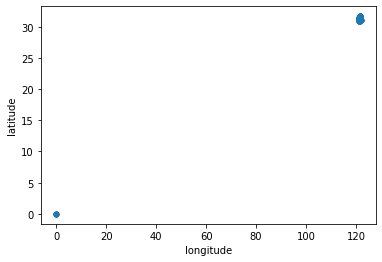

In [19]:
%matplotlib inline
df.plot.scatter(x='longitude',y='latitude');

In [34]:
gdf = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.longitude,df.latitude))
#gdf.crs= "+proj=geocent +ellps=GRS80 +units=m +no_defs"
gfd.head()

AttributeError: module 'geopandas' has no attribute 'points_from_xy'

In [93]:
gdf = gpd.GeoDataFrame(df,geometry =[Point(x,y) for x,y in zip(df.longitude,df.latitude)])
gdf.crs={'init' :'epsg:4326'}

In [71]:
from shapely.geometry import Polygon

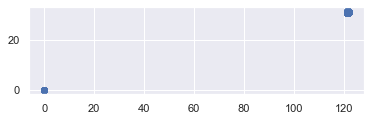

In [72]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
gdf.plot()

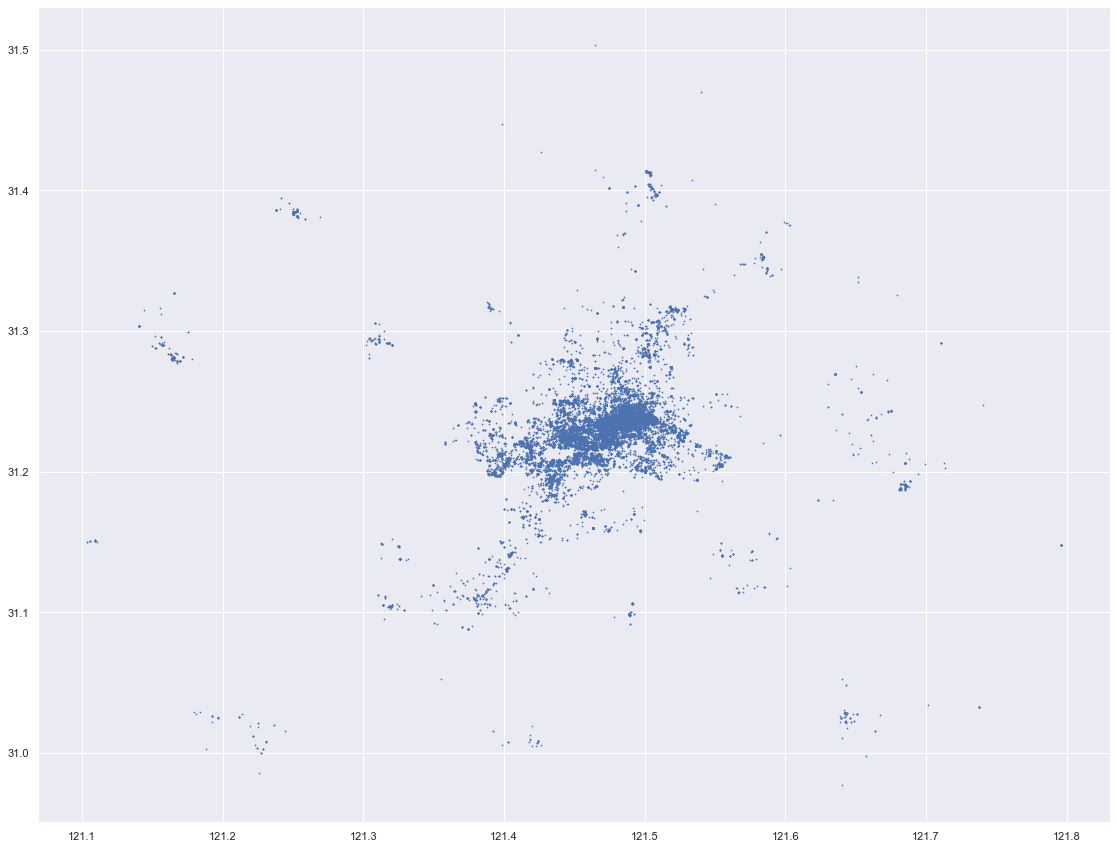

In [94]:

left,top,right,bot=(121.10157,31.514955,121.804611, 30.975)

poly= Polygon([(left,bot),(left,top),(right,top),(right,bot)])
gdf = gdf[gdf.geometry.within(poly)]
gdf.plot(markersize=0.5,figsize=(20,15))

In [78]:
for index , value in gdf['description'].iteritems():
    print(value)

Pearl TV Tower, Shanghai
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places

Camera: Holga 120N

Camera: Holga 120N
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
Holga Shanghai Places
This nice family asked if I'd take a photo of them with their camera, so I took one with mine as well. As you can see, they were quite happy to pose.

Camera: Holga 120FN. The light leaks are really pronounced with this camera.
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
nan
nan
 Holga Shanghai People
Holga Shanghai People
 Holga Shanghai People
 Holga Shanghai People
 Ho

In [82]:
for index , value in gdf['tags'].iteritems():
    print(value)

sky 2004 architecture shanghai pearltower dscp8
holga cityscape shanghai
holga cityscape shanghai
holga cityscape shanghai hotelrooms
holga cityscape shanghai
holga shanghai hotelrooms
holga cityscape shanghai
holga cityscape shanghai hotelrooms
holga cityscape shanghai
holga cityscape shanghai
holga cityscape shanghai
holga cityscape shanghai
holga cityscape shanghai
holga cityscape shanghai
holga cityscape shanghai hotelrooms
holga cityscape shanghai
holga cityscape shanghai
holga cityscape shanghai hotelrooms
people holga shanghai toycamera toycam gheedon
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shanghai
people holga shan

In [81]:
#Remove HTML Beautifulsoup


In [81]:
#Replace Emojis by description emojidescription/dataset
#Reomve punctuation and digits NPTK (python only)
#Tokenize for Social Media NLTK
#Guess language
#Remove the stopwords python NLTK
#Remove the specifics and duplicates
#(Feed the sentece to google word2vec)
#(get the words vector model for top 500 words)

In [108]:
from bs4 import BeautifulSoup
import numpy as np
import string
from nltk.tokenize import casual
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [111]:
corpus = []

translate_table_punc = dict((ord(char), u' ') for char in string.punctuation)
translate_table_digits = dict((ord(char), None) for char in string.digits)
stops = set(stopwords.words('english'))

#lemmatizer = WordNetLemmatizer()7
def remove_punctuation_and_digits(text):
    text = text.translate(translate_table_punc).lower()
    text = text.translate(translate_table_digits)
    return text

def remove_html(text):
    return BeautifulSoup(text,"lxml").get_text()
def tokenize(text):
    return nltk.tokenize.casual_tokenize(text)
def stop_words(words):
    return [w for w in words if w not in stops]

for i,v in gdf['description'].sample(n=200).dropna().iteritems():
    #title = v.title
    #tags = v.tags
    text = remove_html(v)
    text = remove_punctuation_and_digits(text)
    words = tokenize(text)
    words = stop_words(words)
    print(words)

['邓记食园', '定西路', '・', '上海', 'mar']
['shanghai', 'china']
[]
['老场坊原来是原上海工部局宰牲场', '，', '改成创意产业集聚区后继承了原有的结构体系和空间关系', '，', '由于自身的历史背景和建筑特质', '，', '赋予了其独有的魅力', '。', '见证废旧的工业老厂房如何脱胎换骨的建筑正在这个艺术觉醒的时代重获生机', '。', '这幢建于年的大楼空间布局奇特', '，', '外方内园', '，', '东南西北栋建筑围成的四方形厂区与中间一座边形的主楼通过楼梯相连', '。', '整个建筑高低错落', '，', '廊道盘旋', '，', '设计精密宛如迷宫', '，', '却又次序分明', '，', '加工车间采用', '“', '无梁楼盖', '”', '，', '在当时是非常先进的技术', '。', '上海时尚表演', '、', '发布', '、', '展示', '、', '交易', '、', '设计', '、', '服务', '、', '消费', '、', '休闲的中心', '，', '以旅游业带动区域性经济发展', '；', '结合虹口区北外滩的改变形成互动', '，', '成为极具特色的区域性旅游特色产品', '；', '成为承接世博游客居住', '、', '旅游', '、', '消费的重要特色基地', '。']
['虎啸', '武夷路', '・', '上海', 'jul']
['dec']
['羊肉泡馍', '西安美食城', '定西路', '・', '上海', 'feb']
['despite', 'nearly', 'two', 'weeks', 'travel', 'asia', 'good', 'night', 'shanghai', 'au', 'revoir']
['view', 'across', 'huangpu', 'river']
['shanghai', 'china']
['bund']
['shanghai', 'april']
['yuyuan', 'waitan', 'shanghai']
['processed', 'vscocam', 'preset']
['today', 'visiting', 'vasa', 'museum', 'exhibiti